# Coding Etiquette & Excel Reporting: Security implications & Geographic areas

In [4]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# Changing the format of the values visualization

pd.options.display.float_format = '{:.2f}'.format

In [6]:
# Reseting the maximum number of columns to display to default (all columns)

pd.set_option('display.max_columns', None)

In [7]:
# Importing project data

path = r'C:\Users\IVON6\Instacart Basket Analysis'
merged_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

In [8]:
merged_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spenders,median_days_since_prior_order,frequency_flag,last_name,gender,state,age,date_joined,num_dependants,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.80,3139998,138,28,6,11,3.00,False,5,0,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.94,Low spender,8.00,Frequent customer,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.80,1977647,138,30,6,17,20.00,False,1,1,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.94,Low spender,8.00,Frequent customer,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.80,389851,709,2,0,21,6.00,False,20,0,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.93,Low spender,8.00,Frequent customer,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.80,652770,764,1,3,13,NaN,True,10,0,Mid-range product,Slowest day,Slowest days,Most orders,3,New customer,4.97,Low spender,9.00,Frequent customer,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.80,1813452,764,3,4,17,9.00,False,11,1,Mid-range product,Slowest day,Slowest days,Average orders,3,New customer,4.97,Low spender,9.00,Frequent customer,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


## Remove PII data

In [10]:
# Removing last_name column

merged_clean = merged_all.drop(columns=['last_name'])

In [11]:
merged_clean.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spenders,median_days_since_prior_order,frequency_flag,gender,state,age,date_joined,num_dependants,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.80,3139998,138,28,6,11,3.00,False,5,0,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.94,Low spender,8.00,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.80,1977647,138,30,6,17,20.00,False,1,1,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.94,Low spender,8.00,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.80,389851,709,2,0,21,6.00,False,20,0,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.93,Low spender,8.00,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.80,652770,764,1,3,13,NaN,True,10,0,Mid-range product,Slowest day,Slowest days,Most orders,3,New customer,4.97,Low spender,9.00,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.80,1813452,764,3,4,17,9.00,False,11,1,Mid-range product,Slowest day,Slowest days,Average orders,3,New customer,4.97,Low spender,9.00,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both


## Customer behavior in different USA geographic areas

In [13]:
# Census Bureau US regions

def US_region(row):
    northeast_region_1 = ['Maine', 'New Hampshire', 'Rhode Island', 'Vermont', 'Massachusetts', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
    midwest_region_2 = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']
    south_region_3 = ['Alabama', 'Arkansas', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia']
    west_region_4 = ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming']
    
    # Remove leading/trailing spaces
    state = row['state'].strip()  
    
    if state in northeast_region_1:
        return 'Northeast'
    elif state in midwest_region_2:
        return 'Midwest'
    elif state in south_region_3:
        return 'South'
    elif state in west_region_4:
        return 'West'
   
    else:
        return 'No data'  # e.g., missing values

In [14]:
# Applying the function US regions to each row and create a new column 'region'

merged_clean['region'] = merged_clean.apply(US_region, axis=1)

In [15]:
merged_clean.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spenders,median_days_since_prior_order,frequency_flag,gender,state,age,date_joined,num_dependants,marital_status,income,_merge,region
0,1,Chocolate Sandwich Cookies,61,19,5.80,3139998,138,28,6,11,3.00,False,5,0,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.94,Low spender,8.00,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.80,1977647,138,30,6,17,20.00,False,1,1,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.94,Low spender,8.00,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
2,1,Chocolate Sandwich Cookies,61,19,5.80,389851,709,2,0,21,6.00,False,20,0,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.93,Low spender,8.00,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast
3,1,Chocolate Sandwich Cookies,61,19,5.80,652770,764,1,3,13,NaN,True,10,0,Mid-range product,Slowest day,Slowest days,Most orders,3,New customer,4.97,Low spender,9.00,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest
4,1,Chocolate Sandwich Cookies,61,19,5.80,1813452,764,3,4,17,9.00,False,11,1,Mid-range product,Slowest day,Slowest days,Average orders,3,New customer,4.97,Low spender,9.00,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest


In [27]:
merged_clean['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

## Difference in spending habits between the different U.S. regions

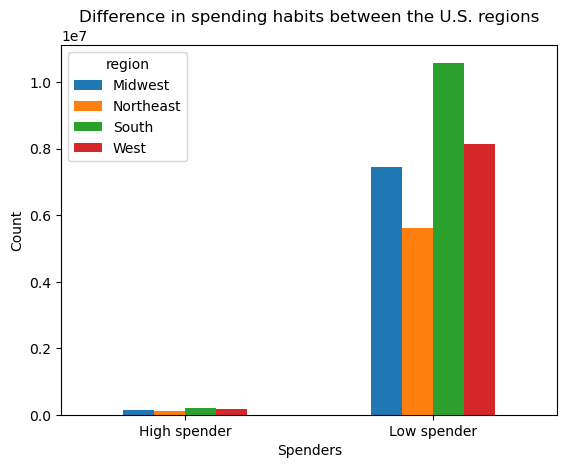

In [39]:
# Grouping and counting the data
region_counts = merged_clean.groupby(['spenders', 'region']).size().unstack()

# Creating a bar chart
bar = region_counts.plot(kind='bar')

# Adding title and labels to the plot
bar.set_title("Difference in spending habits between the U.S. regions")
bar.set_xlabel("Spenders")
bar.set_ylabel("Count")

# Change the rotation on x-axes
plt.xticks(rotation=0)

# Showing the plot
plt.show()

In [41]:
merged_clean['spenders'].value_counts()

spenders
Low spender     31770614
High spender      634245
Name: count, dtype: int64

In [43]:
# Show the counts for each region

print(region_counts)

region        Midwest  Northeast     South     West
spenders                                           
High spender   155975     108225    209691   160354
Low spender   7441350    5614511  10582194  8132559


In [45]:
# export the bar chart
bar.figure.savefig(os.path.join(path, '02 Data','Visualizations', 'barchart_usregion_spenders.png'))

## Create an exclusion flag for low-activity customers (customers with less than 5 orders) 

In [48]:
# create function to flag the low customers

result = []

for value in merged_clean['max_order']:
    if value < 5:
        result.append('low-activity customer')
    else: 
        result.append('high-activity customer')

In [50]:
#creating new column

merged_clean['activity_flag'] = result

In [52]:
#Checking the output

merged_clean['activity_flag'].value_counts(dropna=False)

activity_flag
high-activity customer    30964564
low-activity customer      1440295
Name: count, dtype: int64

In [66]:
# Creating a separate DataFrame for customers with less than 5 orders

df_low_activity_customers=merged_clean[merged_clean['activity_flag'] == 'low-activity customer']

In [67]:
df_low_activity_customers['max_order'].describe()

count   1440295.00
mean          3.52
std           0.50
min           1.00
25%           3.00
50%           4.00
75%           4.00
max           4.00
Name: max_order, dtype: float64

In [68]:
df_low_activity_customers.shape

(1440295, 34)

In [72]:
# Exporting df_low_activity_customers as a separate dataset

df_low_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_low_activity_customers.pkl'))

In [75]:
# Excluding low_order_users from the merged_all dataset

filtered_cust_merged_all = merged_clean[merged_clean['activity_flag'] == 'high-activity customer']

In [76]:
filtered_cust_merged_all['max_order'].describe()

count   30964564.00
mean          34.43
std           24.90
min            5.00
25%           14.00
50%           28.00
75%           48.00
max           99.00
Name: max_order, dtype: float64

In [79]:
# Exporting filtered_cust_merged_all as a separate dataset

filtered_cust_merged_all.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'filtered_cust_merged_all.pkl'))